<h1>Does Education Attainment Status affect COVID-19 Cases and Deaths?</h1>

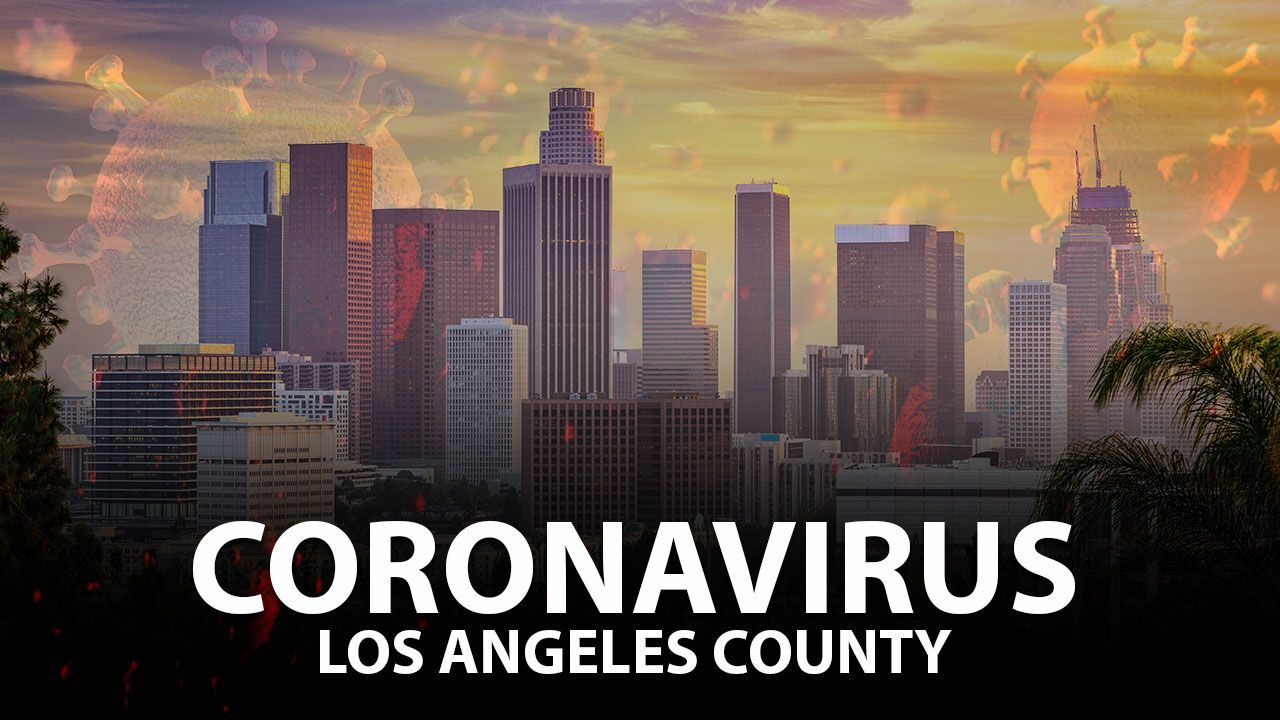

By Dr. F.Chang, DO, MMM


In the city of Los Angeles, the COVID-19 pandemic has been very concerning as it was listed as the epicenter of COVID of the world (1). As misinformation continued to spread, the city was inundated with COVID-19 cases. Although there has been some suggestion of literacy levels playing a factor, no specific studies have been performed in Los Angeles (2). We hypothesize that education level also plays a factor in Los Angeles’s pandemic struggles. However, it is unclear how healthy literacy play a role, and this study will help determine whether to further investigate this topic (health literacy vs misinformation?).


We will first create a map of  the current COVID cases in Los Angeles County. We will apply a heatmap and also plot the deaths to demonstrate the density of the cases. We will then examine if income and education level play a role in the spread of COVID-19. We will plan to use Pearson's test to determine if there is any correlation with these factors.

This data can help assist the Mayor of Los Angeles County, the Department of Los Angeles Public Health and community leaders to develop a readjustment to their response plan as the pandemic has worsen during this time. 

In [212]:
##Import
import pandas as pd
import numpy as pd
import json
import pip
from geopy.geocoders import Nominatim 
from opencage.geocoder import OpenCageGeocode
from pprint import pprint
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize
import folium
import requests
import requests
import urllib.request
import csv
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt  
%matplotlib inline 
print('Libraries imported.')

Libraries imported.


<h2> Data Acquistion </h2>

<h3> Data Uploading </h3>

The data acquired is from Public Health department from La County. It is webscraped utilizing Beautiful Soup package.
Additional data will be obtained from the Public Health department as well in regards to Income and Educational Attainment. 

Cases per City in LA County

In [213]:
### Grab COVID Data
url = 'http://publichealth.lacounty.gov/media/coronavirus/locations.htm#top-25'
response = requests.get(url)

soup = BeautifulSoup(response.text,"html.parser")
##Input the table you want to scrape
table = soup.findAll('table',{"class":"overflow-y"})[0]
values =[]
# CHOOSE HOW MANY ROWS
tr = table.findAll(['tr'])[1:225]
csvFile = open("cases.csv",'wt',newline='',encoding='utf-8')
writer = csv.writer(csvFile)  
try:   
        for cell in tr:
            th = cell.find_all('th')
            th_data = [col.text.strip('\n') for col in th]
            td = cell.find_all('td')
            row = [i.text.replace('\n','') for i in td]
            writer.writerow(th_data+row)      
        
finally:   
    csvFile.close()

In [257]:
##Input Code Hider
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Click here to <a href="javascript:code_toggle()">Hide</a> the input coding.''')

Code has now been obtained. Reload into Pandas and Clean Up Dataset below:

In [214]:
import pandas as pd
dfcases= pd.read_csv("cases.csv", header=None)
##Rename Columns
dfcases.columns = ['Name', 'Cases', 'Case Rate', 'Death', 'Death Rate']
## Strip City of, Strip Los Angeles - 
dfcases['Name'] = dfcases['Name'].str.replace(r'City of', '')
dfcases['Name'] = dfcases['Name'].str.replace(r'Los Angeles -', '')
dfcases['Name'] = dfcases['Name'].str.replace(r'*', '')
dfcases['Name'] = dfcases['Name'].str.replace(r'/Cove', '')
dfcases['Name'] = dfcases['Name'].str.replace(r'/Cochran', '')
dfcases.head(50)

,Name,Cases,Case Rate,Death,Death Rate
0,Agoura Hills,820,3927,12,57
1,Alhambra,5876,6776,113,130
2,Arcadia,2252,3899,82,142
3,Artesia,1735,10330,39,232
4,Avalon,9,233,0,0
5,Azusa,5488,10967,76,152
6,Baldwin Park,11582,15087,196,255
7,Bell,5857,16121,82,226
8,Bell Gardens,7335,17030,68,158
9,Bellflower,9296,11959,113,145


Note:

Case Rate - No. of cases per 100,000 residents

Death Rate - No. of deaths per 100,000 residents

In [215]:
print("Check Row, Column")
dfcases.shape

Check Row, Column


(224, 5)

<h2> Describe Data Set of Cases and Deaths in Los Angeles</h2>

In [217]:
##Drop the Rates and Describe cases
drop_these = ['Case Rate', 'Death Rate']
cases_final = dfcases.drop(columns=drop_these)
cases_final.describe()

,Cases,Death
count,224.000000,224.000000
mean,5790.013393,84.745536
std,28884.048248,418.256034
min,5.000000,0.000000
25%,781.750000,8.750000
50%,2212.500000,36.000000
75%,5679.250000,79.500000
max,431102.000000,6245.000000


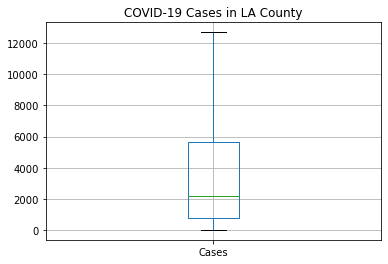

In [218]:
cases_final.boxplot(column=['Cases'], showfliers=False)
plt.title('COVID-19 Cases in LA County')
plt.show()

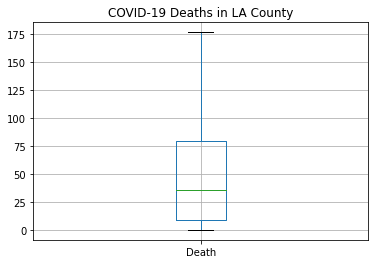

In [219]:
cases_final.boxplot(column=['Death'], showfliers=False)
plt.title('COVID-19 Deaths in LA County')
plt.show()

In [ ]:
Methodology section: The data was acquired and described in regards to cases and deaths. The Max Cases was 431102 and the Max Deaths was 6245, which was both from "Los Angeles" as defined by the LA County Health department. The average amount of cases was 5790 per city and the average amount of deaths was 84 per city. 224 cities in Los Angeles County were counted (based on row count). Half (50%) of the cities had aproximately 2212 cases and 36 deaths. You can see this data ploted in the box plots above.  

<h2> Long/Lat Acquisition </h2>

We will use Nominatim to obtain Coordinates for Plotting.

In [220]:
## Add CA to the Location to help with specificity of Geo Search
z = cases_final[['Name','Cases','Death']].copy()
z['Name'] = z['Name'].str.strip()
z['Name'] = z['Name'].astype(str) +', CA' 

In [221]:
## Drop locations that Geocoder can't fetch correctly
z = z.drop(index=[98,99,102,104,108,110,111,112,121,123,127,129,137,149,151,156,159,160,161,162,167,176,179,183,185,186,195,196,197,209,210,212,216,222])
##Sanity Check
z.tail(10)

,Name,Cases,Death
211,"Watts, CA",6584,67
213,"West Adams, CA",3448,103
214,"West Hills, CA",2488,77
215,"West Los Angeles, CA",1935,32
217,"Westchester, CA",1937,31
218,"Westlake, CA",6756,204
219,"Westwood, CA",2095,18
220,"Wholesale District, CA",5663,73
221,"Wilmington, CA",7037,52
223,"Winnetka, CA",5796,51


In [222]:
print("Check Row, Column")
z.shape

Check Row, Column


(190, 3)

In [223]:
##Check if Nominatim works or not
address='Hawaiian Gardens, CA'
geolocator = Nominatim(user_agent="Your_Name")
location = geolocator.geocode(address)
print("Testing System:")
print(location.address)
print((location.latitude, location.longitude))

Testing System:
Hawaiian Gardens, Los Angeles County, California, United States
(33.8284787, -118.0743137)


In [224]:
## Code Long/Lat and Add to Table
geolocator = Nominatim(user_agent="Fw")
z['Long'] = z['Name'].apply(geolocator.geocode).apply(lambda x: x.longitude)
z['Lat'] = z['Name'].apply(geolocator.geocode).apply(lambda x: x.latitude)
z

,Name,Cases,Death,Long,Lat
0,"Agoura Hills, CA",820,12,-118.765704,34.147910
1,"Alhambra, CA",5876,113,-118.127060,34.093042
2,"Arcadia, CA",2252,82,-118.040150,34.136207
3,"Artesia, CA",1735,39,-118.079620,33.869020
4,"Avalon, CA",9,0,-118.327261,33.342210
...,...,...,...,...,...
218,"Westlake, CA",6756,204,-118.272820,34.062923
219,"Westwood, CA",2095,18,-118.430635,34.056121
220,"Wholesale District, CA",5663,73,-118.235434,34.036575
221,"Wilmington, CA",7037,52,-118.262509,33.780016


In [15]:
##Create Marker Size to help with Death Markers
locsize = z[['Name','Cases','Death','Lat','Long']].copy()
locsize['size']=locsize['Death'].apply(lambda count:12 if count>=200 else
                                         8 if count>=150 and count<200 else
                                         4 if count>=75 and count<150 else
                                         1 if count>=25 and count<75 else
                                         0.1)
locsize

,Name,Cases,Death,Lat,Long,size
0,"Agoura Hills, CA",810,12,34.147910,-118.765704,0.1
1,"Alhambra, CA",5825,110,34.093042,-118.127060,4.0
2,"Arcadia, CA",2237,79,34.136207,-118.040150,4.0
3,"Artesia, CA",1714,38,33.869020,-118.079620,1.0
4,"Avalon, CA",9,0,33.342210,-118.327261,0.1
...,...,...,...,...,...,...
218,"Westlake, CA",6709,202,34.062923,-118.272820,12.0
219,"Westwood, CA",2073,19,34.056121,-118.430635,0.1
220,"Wholesale District, CA",5609,71,34.036575,-118.235434,1.0
221,"Wilmington, CA",6937,52,33.780016,-118.262509,1.0


In [225]:
## Create Map/HeatMap
from folium.plugins import HeatMap
LaCovid = folium.Map(location=[34, -118.2], zoom_start=9.7)
HeatMap(data=locsize[['Lat', 'Long', 'Cases']].groupby(['Lat', 'Long']).sum().reset_index().values.tolist(), radius=20, blur=15, max_val=45).add_to(LaCovid)
##Create Markers
z_d = folium.map.FeatureGroup()
for Lat, Long, Size in zip(locsize['Lat'],locsize['Long'], locsize['size']):
    ## locsize.Lat, locsize.Long, locsize.size
    z_d.add_child(
        folium.features.CircleMarker(
            [Lat, Long],
            name='Deaths',
            radius=Size, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='black',
            fill_opacity=0.3
        )
    )

In [226]:
##TIMESTAMP
url_timestamp = 'http://publichealth.lacounty.gov/media/coronavirus/locations.htm#top-25'
tsresponse = requests.get(url_timestamp)
tssoup = BeautifulSoup(tsresponse.text,"html.parser")
timestamp = tssoup.find('div', attrs={"class":"container-xl pb-4"})
timestamp2=tssoup.find('small', class_= "text-muted")
timestampstring=timestamp2.text[5:23]

<h2>"COVID-19 Cases Heat Map in Los Angeles County"</h2>

In [227]:
LaCovid
LaCovid.add_child(z_d)

In [20]:
print("According to LA County, last updated:")
print(timestampstring)

According to LA County, last updated:
 6:00pm 01/21/2021


Based on the mapping, we can see a heatmap of Los Angeles County in regards to cases. The more red an area is noted, the more cases we have noted in that area. We also see black circles that represent deaths in Los Angeles County. Again, the larger the circles, the more deaths are noted in that geography. Please keep in mind, the data is shown of <i><b>Los Angeles County</b></i> and therefore there was limited data from Long Beach, Orange County, Inland Empire, etc, when interpreting this data.

We can see that there is significant amount of cases in South Los Angeles, Inglewood, Pomona,and San Fernando Valley. We can also see that there are more deaths in these areas as well, which makes sense following high case rates. We will now conduct further correlation studies to see if education status plays a role in COVID.

<h2> Check local market </h2>

Based on this map, it appears that downtown Los Angeles has the highest cases (based on the heat map) and the highest deaths. We will see how many super markets are in the area. We will check two other places.


In [184]:
print(locsize.loc[locsize['Name'] == 'Los Angeles, CA'])


               Name   Cases  Death        Lat        Long  size
85  Los Angeles, CA  426679   6154  34.053691 -118.242766  12.0


In [260]:
latitude = "34.053691"
longitude = "-118.2428766"

In [261]:
CLIENT_ID = 'D2L5ZRBXQXA34OIF13OZDXBUX5VOIDHTVSZVWETC3LPU3SOA' # your Foursquare ID
CLIENT_SECRET = 'S5DCBYUAUYWR5VWKGBYN34Z1Q3HKPLYXYC1WXKIKIVAAJVHN' # your Foursquare Secret
ACCESS_TOKEN = '25KM41A0XJYYCNGBEZX3RDGZL0CDGCXA4D2JGATPYSVDEHSN' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
##KME5WBGULFO0LYT1WTXV32KSLBUSCR4JE0ZSXKOX5Y404EEV#_=_
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D2L5ZRBXQXA34OIF13OZDXBUX5VOIDHTVSZVWETC3LPU3SOA
CLIENT_SECRET:S5DCBYUAUYWR5VWKGBYN34Z1Q3HKPLYXYC1WXKIKIVAAJVHN


In [262]:
search_query = 'Super Market'
radius = 1000
print(search_query + ' .... OK!')

Super Market .... OK!


In [263]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '600cd36a2dd20635beb4ce7a'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '49f65012f964a5202f6c1fe3',
    'name': 'Grand Central Market',
    'location': {'address': '317 S Broadway',
     'crossStreet': 'btwn 3rd & 4th St',
     'lat': 34.050675036096266,
     'lng': -118.24874061147524,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.050675036096266,
       'lng': -118.24874061147524}],
     'distance': 636,
     'postalCode': '90013',
     'cc': 'US',
     'neighborhood': 'Downtown Los Angeles',
     'city': 'Los Angeles',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['317 S Broadway (btwn 3rd & 4th St)',
      'Los Angeles, CA 90013']},
    'categories': [{'id': '50be8ee891d4fa8dcc7199a7',
      'name': 'Market',
      'pluralName': 'Markets',
      'shortName': 'Market',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/

In [265]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframela = json_normalize(venues)
dataframela.head()

<ipython-input-265-9a6f1bfbfe7b>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframela = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,49f65012f964a5202f6c1fe3,Grand Central Market,"[{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...",v-1611453290,False,317 S Broadway,btwn 3rd & 4th St,34.050675,-118.248741,"[{'label': 'display', 'lat': 34.05067503609626...",...,CA,United States,"[317 S Broadway (btwn 3rd & 4th St), Los Angel...",2058806,https://www.grubhub.com/restaurant/sticky-rice...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
1,4a8e02c9f964a520bb1120e3,Marukai Market,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",v-1611453290,False,123 Astronaut E S Onizuka St,E 1st St,34.050049,-118.242148,"[{'label': 'display', 'lat': 34.05004924958774...",...,CA,United States,"[123 Astronaut E S Onizuka St (E 1st St), Los ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4a2dcdf8f964a520f6971fe3,Little Tokyo Market Place,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1611453290,False,333 S Alameda St #100,at E 3rd St,34.044746,-118.238639,"[{'label': 'display', 'lat': 34.04474630692715...",...,CA,United States,"[333 S Alameda St #100 (at E 3rd St), Los Ange...",1128330,https://www.grubhub.com/restaurant/little-toky...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
3,4abd80aaf964a520b78a20e3,Nijiya Market,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",v-1611453290,False,124 Japanese Village Plaza Mall,NaN,34.048808,-118.240199,"[{'label': 'display', 'lat': 34.04880769087117...",...,CA,United States,"[124 Japanese Village Plaza Mall, Los Angeles,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51364ea7e4b01b8cdaab23c8,Grand Park Downtown Farmers Market,"[{'id': '4bf58dd8d48988d1fa941735', 'name': 'F...",v-1611453290,False,First Street (Civic Center),btw Spring & Broadway,34.052374,-118.244716,"[{'label': 'display', 'lat': 34.05237399280374...",...,CA,United States,[First Street (Civic Center) (btw Spring & Bro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
print(dataframela.shape)
print ("The row number is the number of Super Markets")

(50, 25)
The row number is the number of Super Markets


In [192]:
print(locsize.loc[locsize['Name'] == 'Pacoima, CA'])

            Name  Cases  Death        Lat        Long  size
166  Pacoima, CA  14928    143  34.262502 -118.427027   4.0


In [267]:
latitude = "34.262502"
longitude = "-118.427027"

In [268]:
CLIENT_ID = 'D2L5ZRBXQXA34OIF13OZDXBUX5VOIDHTVSZVWETC3LPU3SOA' # your Foursquare ID
CLIENT_SECRET = 'S5DCBYUAUYWR5VWKGBYN34Z1Q3HKPLYXYC1WXKIKIVAAJVHN' # your Foursquare Secret
ACCESS_TOKEN = '25KM41A0XJYYCNGBEZX3RDGZL0CDGCXA4D2JGATPYSVDEHSN' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
##KME5WBGULFO0LYT1WTXV32KSLBUSCR4JE0ZSXKOX5Y404EEV#_=_
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D2L5ZRBXQXA34OIF13OZDXBUX5VOIDHTVSZVWETC3LPU3SOA
CLIENT_SECRET:S5DCBYUAUYWR5VWKGBYN34Z1Q3HKPLYXYC1WXKIKIVAAJVHN


In [269]:
search_query = 'Super Market'
radius = 500
print(search_query + ' .... OK!')

Super Market .... OK!


In [270]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '600cd38b5e07026e910aeb19'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '58773e65c45ee378fa725b4c',
    'name': 'Superior Sound',
    'location': {'address': '13665 Van Nuys Blvd',
     'lat': 34.2606924649216,
     'lng': -118.43021392822266,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.2606924649216,
       'lng': -118.43021392822266}],
     'distance': 355,
     'postalCode': '91331',
     'cc': 'US',
     'city': 'Los Angeles',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['13665 Van Nuys Blvd', 'Los Angeles, CA 91331']},
    'categories': [{'id': '52f2ab2ebcbc57f1066b8b50',
      'name': 'Cable Car',
      'pluralName': 'Cable Cars',
      'shortName': 'Cable Car',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/trainstation_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-16114533

In [271]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframepa = json_normalize(venues)
dataframepa.head()

<ipython-input-271-1c31e372d15d>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframepa = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,58773e65c45ee378fa725b4c,Superior Sound,"[{'id': '52f2ab2ebcbc57f1066b8b50', 'name': 'C...",v-1611453323,False,13665 Van Nuys Blvd,34.260692,-118.430214,"[{'label': 'display', 'lat': 34.2606924649216,...",355,91331,US,Los Angeles,CA,United States,"[13665 Van Nuys Blvd, Los Angeles, CA 91331]"
1,4cfc7295c671721e19d0c818,La Placita Market,[],v-1611453323,False,NaN,34.259058,-118.432354,"[{'label': 'display', 'lat': 34.25905818619095...",622,NaN,US,NaN,California,United States,[California]


In [273]:
print(dataframepa.shape)
print ("The row number is the number of Super Markets")

(2, 16)
The row number is the number of Super Markets


In [204]:
print(locsize.loc[locsize['Name'] == 'Van Nuys, CA'])

             Name  Cases  Death        Lat        Long  size
203  Van Nuys, CA  12531    216  34.186619 -118.448667  12.0


In [278]:
latitude = "34.186619"
longitude = "-118.448667"

In [279]:
CLIENT_ID = 'D2L5ZRBXQXA34OIF13OZDXBUX5VOIDHTVSZVWETC3LPU3SOA' # your Foursquare ID
CLIENT_SECRET = 'S5DCBYUAUYWR5VWKGBYN34Z1Q3HKPLYXYC1WXKIKIVAAJVHN' # your Foursquare Secret
ACCESS_TOKEN = '25KM41A0XJYYCNGBEZX3RDGZL0CDGCXA4D2JGATPYSVDEHSN' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
##KME5WBGULFO0LYT1WTXV32KSLBUSCR4JE0ZSXKOX5Y404EEV#_=_
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D2L5ZRBXQXA34OIF13OZDXBUX5VOIDHTVSZVWETC3LPU3SOA
CLIENT_SECRET:S5DCBYUAUYWR5VWKGBYN34Z1Q3HKPLYXYC1WXKIKIVAAJVHN


In [280]:
search_query = 'Super market'
radius = 500
print(search_query + ' .... OK!')

Super market .... OK!


In [281]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '600cd3d31583b9317b045976'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '543fa51e498e4d1e391b8e77',
    'name': 'Inbound Real Estate Marketing',
    'location': {'address': '6360 Van Nuys Blvd Suite #109',
     'lat': 34.18662083043296,
     'lng': -118.4486970305443,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.18662083043296,
       'lng': -118.4486970305443}],
     'distance': 2,
     'postalCode': '91411',
     'cc': 'US',
     'city': 'Los Angeles',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['6360 Van Nuys Blvd Suite #109',
      'Los Angeles, CA 91411']},
    'categories': [{'id': '4bf58dd8d48988d130941735',
      'name': 'Building',
      'pluralName': 'Buildings',
      'shortName': 'Building',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
       'suffix': '.png'},
      'primary': True

In [282]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframevn = json_normalize(venues)
dataframevn.head()

<ipython-input-282-8f89c1aaf18f>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframevn = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.crossStreet,venuePage.id
0,543fa51e498e4d1e391b8e77,Inbound Real Estate Marketing,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1611453395,False,6360 Van Nuys Blvd Suite #109,34.186621,-118.448697,"[{'label': 'display', 'lat': 34.18662083043296...",2,...,United States,"[6360 Van Nuys Blvd Suite #109, Los Angeles, C...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5b308e348d0a53002c69c22a,Vet Marketing Pro,"[{'id': '5453de49498eade8af355881', 'name': 'B...",v-1611453395,False,6374 Van Nuys Blvd Ste 100,34.186413,-118.448288,"[{'label': 'display', 'lat': 34.1864128112793,...",41,...,United States,"[6374 Van Nuys Blvd Ste 100, Van Nuys, CA 91401]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4f32182c19836c91c7b53d01,Super Pollo,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1611453395,False,6470 Van Nuys Blvd,34.188217,-118.448296,"[{'label': 'display', 'lat': 34.18821716308594...",181,...,United States,"[6470 Van Nuys Blvd, Van Nuys, CA 91401]",1685887,https://www.grubhub.com/restaurant/el-pollo-lo...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
3,5980a3b2c0f1634fed05241e,Super Discount Pharmacy,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",v-1611453395,False,14618 Victory Blvd Ste B,34.186452,-118.451576,"[{'label': 'display', 'lat': 34.186452, 'lng':...",268,...,United States,"[14618 Victory Blvd Ste B (Cedros Ave), Van Nu...",NaN,NaN,NaN,NaN,NaN,NaN,Cedros Ave,NaN
4,54379511498e89864900de53,Roman Rivera | Diseno Web | Web Design - Marke...,"[{'id': '52f2ab2ebcbc57f1066b8b36', 'name': 'I...",v-1611453395,False,"6360 Van Nuys Blvd, Suite 173",34.186024,-118.448273,"[{'label': 'display', 'lat': 34.186024, 'lng':...",75,...,United States,"[6360 Van Nuys Blvd, Suite 173 (Van Nuys), Van...",NaN,NaN,NaN,NaN,NaN,NaN,Van Nuys,110978172


In [283]:
print(dataframevn.shape)
print ("The row number is the number of Super Markets")

(8, 24)
The row number is the number of Super Markets


Based on this informal analysis by pulling the foursquare API, we can see that the highest location of death/cases (Los Angeles) had more Super Market values than the 2nd, which was Van Nuys. Also pulling a location with higher cases but relatively lower amount of deaths, Pacoima, CA, demonstrates only 2 Super Markets. 

While this data doesn't necessarily show us that more Super Markets means higher chance of death, we can use this preliminary data to design further studies.

<h3> Append with other data </h3>

We will now initiate cleaning the other data sets and joining on the final table for the stats analysis.

In [231]:
##Start Append System
casesappend = cases_final[['Name','Cases','Death']].copy()

In [233]:
##Import Income from LA County

import requests
incomeurl = "http://publichealth.lacounty.gov/ohae/docs/cchp/xlsx/2018/MedianIncome.xlsx"
resp = requests.get(incomeurl)

output = open('income.csv', 'wb')
output.write(resp.content)
output.close()
import pandas as pd
dfincome= pd.read_excel("income.csv", header=None)
dfincome.head(10)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,City/Community,Estimate,95% Confidence Interval2: Lower Limit,95% Confidence Interval: Upper Limit
5,NaN,Alhambra,53582,50105.4,57058.6
6,NaN,Altadena,86050,81905.3,90194.7
7,NaN,Arcadia,79934,74551.2,85316.8
8,NaN,Azusa,53135,49472,56798
9,NaN,Baldwin Park,51742,49903.9,53580.1


In [234]:
##Cleanse Income Data
dfincome.columns = ['Drop', 'Name','Income', 'CI1', 'CI2']
dfincome_a = dfincome.drop(['Drop','CI1','CI2'], axis=1)

dfincome_a = dfincome_a.dropna()
dfincome_b = dfincome_a.reset_index(drop=True)
dfincome_c = dfincome_b.iloc[1:]
dfincome_c.head()

,Name,Income
1,Alhambra,53582
2,Altadena,86050
3,Arcadia,79934
4,Azusa,53135
5,Baldwin Park,51742


In [237]:
##Continue Cleansing and Join
casesappend['Name'] = casesappend['Name'].str.strip()
pd.options.mode.chained_assignment = None  # default='warn'
dfincome_c['Name'] = dfincome_c["Name"].str.strip()

In [239]:
c = pd.merge(casesappend, dfincome_c, how='inner',left_on='Name', right_on = 'Name', sort=False)
c['Name'] =  c['Name'].astype(str) +', CA' 

<h2>Edu Index </h2>

For the education levels, LA County Data was utilized and an Education Index was created by performing a 
LINEST function over the four types of categories (Less Than High School, High School Graduate, Some College, Bachelor Degree or Higher) to obtain a slope value and then normalizing the value to create an educational index.
The education index is described as a value from 0-1, with 0 being very low educational attainment and 1 being very high educational attainment. Data was appropriately examined prior to joining onto the main table.
Credit: Dr. E.C, PhD for examining this table and creating the index methodology based on source data.
Source:http://publichealth.lacounty.gov/ohae/docs/cchp/xlsx/2018/EducAttainment.xlsx

In [241]:
##Import Education from LA County
import pandas as pd
dfedu= pd.read_excel("Education Index.xlsx", header=None)
dfedu.columns = ['Name', 'Edu Index']
dfedu['Name'] =  dfedu['Name'].astype(str) +', CA' 
print("Column, Row check:")
dfedu.shape

Column, Row check:


(88, 2)

In [242]:
##Join on Final Table with Edu Index
dffinal = pd.merge(c, dfedu, how='inner',left_on='Name', right_on = 'Name', sort=False)

In [243]:
##Adjust to Float
dffinal['Income']=dffinal['Income'].astype('float64')
dffinal['Edu Index']=dffinal['Edu Index'].astype('float64')

In [244]:
##Get Tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


<h2> Statistical Analysis of the Data </h2>

In [246]:
##Call Correlation
dffinal.corr()

,Cases,Death,Income,Edu Index
Cases,1.000000,0.801477,-0.498338,-0.368533
Death,0.801477,1.000000,-0.471728,-0.234117
Income,-0.498338,-0.471728,1.000000,0.755002
Edu Index,-0.368533,-0.234117,0.755002,1.000000


(0.0, 411.05)

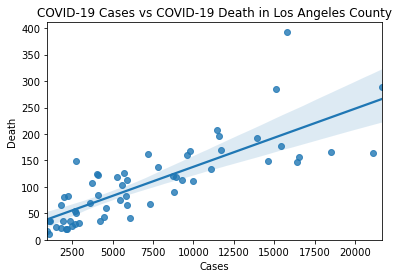

In [247]:
sns.regplot(x="Cases", y="Death", data=dffinal).set_title('COVID-19 Cases vs COVID-19 Death in Los Angeles County')
plt.ylim(0,)

(0.0, 23070.27931029865)

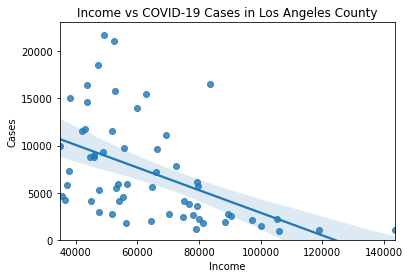

In [248]:
sns.regplot(x="Income", y="Cases", data=dffinal).set_title('Income vs COVID-19 Cases in Los Angeles County')
plt.ylim(0,)

(0.0, 414.9336106761206)

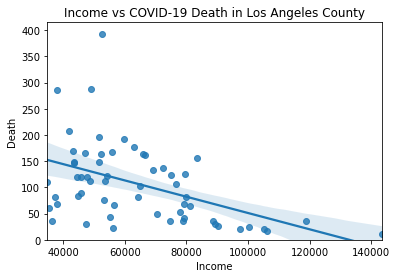

In [249]:
sns.regplot(x="Income", y="Death", data=dffinal).set_title('Income vs COVID-19 Death in Los Angeles County')
plt.ylim(0,)

(0.0, 22720.1)

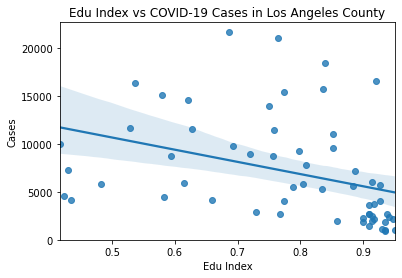

In [250]:
sns.regplot(x="Edu Index", y="Cases", data=dffinal).set_title('Edu Index vs COVID-19 Cases in Los Angeles County')
plt.ylim(0,)

(0.0, 411.05)

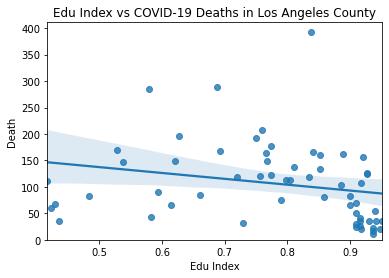

In [251]:
sns.regplot(x="Edu Index", y="Death", data=dffinal).set_title('Edu Index vs COVID-19 Deaths in Los Angeles County')
plt.ylim(0,)

In [252]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dffinal['Death'], dffinal['Cases'])
print("Death vs Cases:")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

Death vs Cases:
The Pearson Correlation Coefficient is 0.8014773796042758  with a P-value of P = 2.4389547134895833e-14


In [253]:
pearson_coef, p_value = stats.pearsonr(dffinal['Edu Index'], dffinal['Cases'])
print("Edu Index vs Cases:")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

Edu Index vs Cases:
The Pearson Correlation Coefficient is -0.36853306682925935  with a P-value of P = 0.004078498019970787


In [254]:
pearson_coef, p_value = stats.pearsonr(dffinal['Edu Index'], dffinal['Death'])
print("Edu Index vs Death:")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

Edu Index vs Death:
The Pearson Correlation Coefficient is -0.23411668140389894  with a P-value of P = 0.07430970566838907


In [255]:
pearson_coef, p_value = stats.pearsonr(dffinal['Income'], dffinal['Cases'])
print("Income vs Cases:")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

Income vs Cases:
The Pearson Correlation Coefficient is -0.4983378396806178  with a P-value of P = 5.904023195599915e-05


In [256]:
pearson_coef, p_value = stats.pearsonr(dffinal['Income'], dffinal['Death'])
print("Income vs Death:")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

Income vs Death:
The Pearson Correlation Coefficient is -0.47172827846729815  with a P-value of P = 0.0001622318484684955


<h2>Discussion</h2>

After examining the trends, it appears that Cases and Death are strongtly correlated, as logically expected. There also appears to be some trend towards increasing income causing a decrease in deaths. However, we do not see as strong of a correlation of Education playing a role in causing COVID-19 Cases/Deaths. Our hypothesis was that potentially health literacy may contribute to the increasing cases either due to poor comprehension of the Pandemic and/or clinical provider instructions. In addition, we also hypothesized that potentially misinformation could play a role here. Again, it is very difficult to correlate anything strongly from this study in regards to Edu Index and cases/deaths. We, however, do see a better trend in an inverse proportion of income to COVID-19 cases and death. The most likely explanation is tied to essential workers, who tend to be lower wage workers, needing to provide services and therefore, unfortunately being infected during their work. This study helps provide some justification of protecting our essential workers given the higher risk nature of their work. We hope to perform further analysis in other interesting areas such as demographics and smoking status in the future. 

<h2>Conclusion</h2>

While this study does not demonstrate clear indication of education attainment affecting COVID-19 Cases and Death, further investigation should be done with US Census data to confirm. More ways to obtain Super Market location data could allow for further investigation of the essential workers factor as a cause of cases/death as well.  

References:
    
(1)L.A. County on verge of becoming COVID-19 epicenter - Los Angeles Times (latimes.com)

(2) Paakkari L, Okan O. COVID-19: health literacy is an underestimated problem. Lancet Public Health. 2020;5(5):e249-e250. doi:10.1016/S2468-2667(20)30086-4